## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
PATH = '../data/2019-20/players_raw.csv'

In [4]:
players_df = pd.read_csv(PATH)

## Threshold on minutes played

In [5]:
players_df = players_df[players_df['minutes'] > 90*15] #should have played atleast 15 full matches

In [6]:
players_df

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
2,2,1,331,100,100,4,111457,0,0,-3,...,98,55,65194,0,134275,0,0.5,10.6,Kolasinac,4
4,0,5,305,100,100,4,39476,0,0,-2,...,76,57,182201,0,231413,0,0.0,11.9,Sokratis,6
10,5,37,807,100,100,10,54694,0,0,-1,...,7,205,3870546,0,4120318,0,0.6,18.8,Aubameyang,3
11,7,16,387,100,100,5,59966,0,0,-3,...,19,118,458912,0,551879,0,0.5,12.8,Lacazette,8
13,0,10,591,0,0,7,80201,0,0,-2,...,63,114,737120,0,865543,0,0.0,23.8,Leno,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,8,680,None,None,13,38533,0,0,3,...,69,153,1224396,0,957926,0,0.7,28.9,Patrício,0
647,2,7,498,100,100,13,171317,0,0,-3,...,72,97,410866,0,676439,0,0.6,18.7,Neves,9
648,7,12,617,None,None,11,19624,0,0,-2,...,133,113,684882,0,836481,0,0.4,21.3,Moutinho,7
650,9,14,522,100,100,7,159533,0,0,6,...,32,130,3191443,0,2346310,0,0.3,23.2,Traoré,1


In [7]:
players_df.sort_values(by=['minutes'], inplace=True, ascending = False)
players_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded',
       'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type',
       'id', 'in_dreamteam', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'news', 'news_added', 'now_cost',
       'own_goals', 'penalties_missed', 'penalties_saved', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'threat', 'threat_rank', 'threat_rank_type',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_

## Making a custom dataframe

In [39]:
screened_players_df = players_df[['first_name', 'second_name', 'web_name', 'element_type', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved','total_points', 'points_per_game', 'threat', 'threat_rank', 'threat_rank_type','transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'yellow_cards', 'red_cards', 'now_cost', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall']]
screened_players_df.to_csv('./screened_players.csv', index = False)

In [9]:
screened_players_df.sort_values(by=['minutes'], ascending = False)
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game']]

,web_name,minutes,now_cost,total_points,points_per_game
136,Tarkowski,3420,55,143,3.8
644,Patrício,3420,53,153,4.0
577,Foster,3420,49,137,3.6
368,de Gea,3420,53,143,3.8
112,Ryan,3420,47,135,3.6
...,...,...,...,...,...
328,Mendy,1491,55,74,3.9
553,Lo Celso,1482,73,54,1.9
379,Pereira,1478,47,60,2.4
307,Chamberlain,1475,61,76,2.5


In [10]:
screened_players_df['matches_played'] = round(screened_players_df['total_points'] / screened_players_df['points_per_game'])

<ipython-input-10-95780c440502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screened_players_df['matches_played'] = round(screened_players_df['total_points'] / screened_players_df['points_per_game'])


In [11]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']]

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
136,Tarkowski,3420,55,143,3.8,38.0
644,Patrício,3420,53,153,4.0,38.0
577,Foster,3420,49,137,3.6,38.0
368,de Gea,3420,53,143,3.8,38.0
112,Ryan,3420,47,135,3.6,38.0
...,...,...,...,...,...,...
328,Mendy,1491,55,74,3.9,19.0
553,Lo Celso,1482,73,54,1.9,28.0
379,Pereira,1478,47,60,2.4,25.0
307,Chamberlain,1475,61,76,2.5,30.0


## Sort by total points

In [12]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']].sort_values(by=['total_points'], ascending = False).head(15)

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
338,De Bruyne,2790,106,251,7.2,35.0
305,Salah,2879,125,233,6.9,34.0
306,Mané,2745,121,221,6.3,35.0
296,Alexander-Arnold,3173,77,210,5.5,38.0
270,Vardy,3032,97,210,6.0,35.0
10,Aubameyang,3136,109,205,5.7,36.0
337,Sterling,2651,120,204,6.2,33.0
372,Martial,2625,85,200,6.2,32.0
499,Ings,2800,76,198,5.2,38.0
642,Jiménez,3241,80,194,5.1,38.0


## Sort by points per game

In [13]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']].sort_values(by=['points_per_game'], ascending = False).head(15)

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
338,De Bruyne,2790,106,251,7.2,35.0
305,Salah,2879,125,233,6.9,34.0
306,Mané,2745,121,221,6.3,35.0
337,Sterling,2651,120,204,6.2,33.0
372,Martial,2625,85,200,6.2,32.0
270,Vardy,3032,97,210,6.0,35.0
10,Aubameyang,3136,109,205,5.7,36.0
366,Rashford,2645,89,177,5.7,31.0
540,Son,2478,97,169,5.6,30.0
296,Alexander-Arnold,3173,77,210,5.5,38.0


In [14]:
ppg_df = screened_players_df[['web_name', 'points_per_game', 'total_points', 'now_cost']]

In [15]:
ppg_df

,web_name,points_per_game,total_points,now_cost
136,Tarkowski,3.8,143,55
644,Patrício,4.0,153,53
577,Foster,3.6,137,49
368,de Gea,3.8,143,53
112,Ryan,3.6,135,47
...,...,...,...,...
328,Mendy,3.9,74,55
553,Lo Celso,1.9,54,73
379,Pereira,2.4,60,47
307,Chamberlain,2.5,76,61


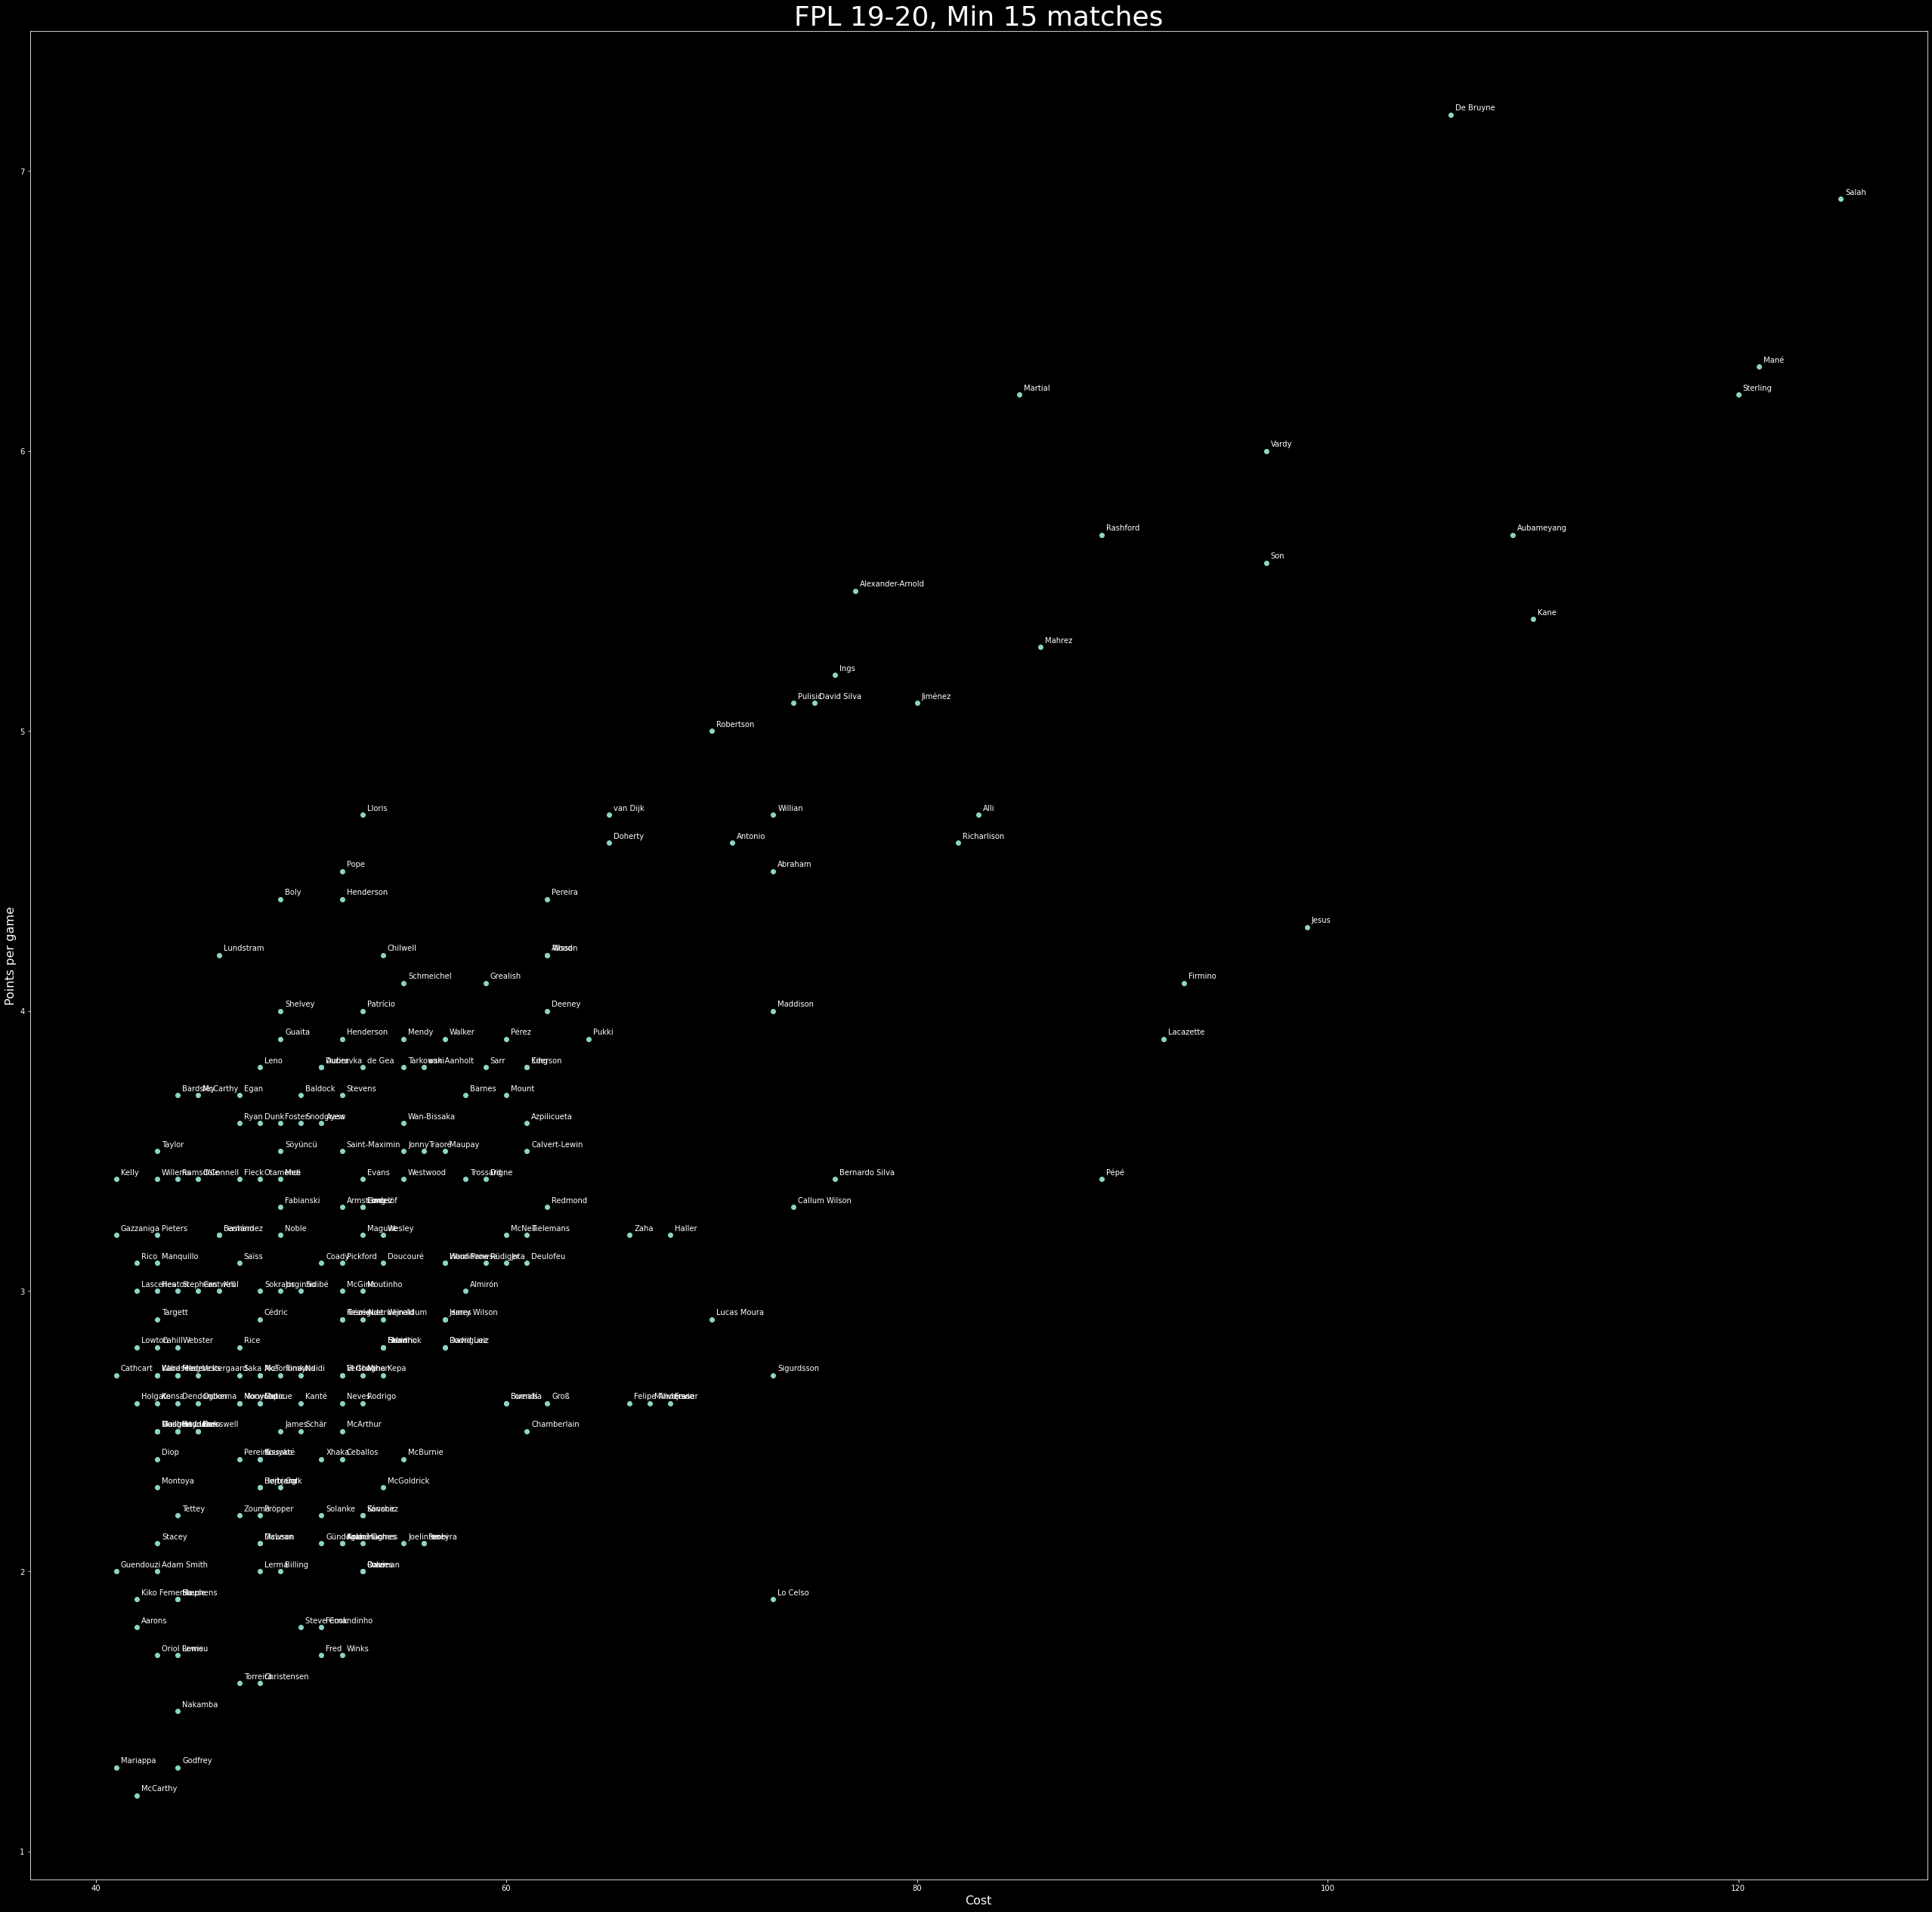

In [69]:
fg_color = 'white'
plt.figure(figsize=(45,45))
plt.style.use("dark_background")
plt.title('FPL 19-20, Min 15 matches', color=fg_color, size = 36)
plt.xlabel('Cost', color=fg_color, size = 16)
plt.ylabel('Points per game', color=fg_color, size = 16)
plt.scatter(ppg_df['now_cost'] , ppg_df['points_per_game'],  marker='o')
for x,y,lbl in zip(ppg_df['now_cost'] , ppg_df['points_per_game'], ppg_df['web_name']):
    label = lbl

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(6,6), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.savefig('FPL_full_plot.png')
plt.show()

## Premium Players

In [46]:
premium_df = ppg_df[ppg_df['now_cost'] > 90]
premium_df.sort_values(by=['points_per_game'], ascending = False)

,web_name,points_per_game,total_points,now_cost
338,De Bruyne,7.2,251,106
305,Salah,6.9,233,125
306,Mané,6.3,221,121
337,Sterling,6.2,204,120
270,Vardy,6.0,210,97
10,Aubameyang,5.7,205,109
540,Son,5.6,169,97
536,Kane,5.4,158,110
334,Jesus,4.3,146,99
301,Firmino,4.1,155,93


## Top Players

In [49]:
top_df = ppg_df[(ppg_df['now_cost'] < 90) & (ppg_df['now_cost'] >70)]
top_df.sort_values(by=['points_per_game'], ascending = False)

,web_name,points_per_game,total_points,now_cost
372,Martial,6.2,200,85
366,Rashford,5.7,177,89
296,Alexander-Arnold,5.5,210,77
340,Mahrez,5.3,175,86
499,Ings,5.2,198,76
642,Jiménez,5.1,194,80
342,David Silva,5.1,139,75
185,Pulisic,5.1,127,74
542,Alli,4.7,117,83
177,Willian,4.7,168,73


In [60]:
top_df.shape

(19, 4)

## Mid range players

In [61]:
midrange_df = ppg_df[(ppg_df['now_cost'] < 70) & (ppg_df['now_cost'] >55)]
print(midrange_df.shape)
midrange_df.sort_values(by=['points_per_game'], ascending = False).head(10)

(46, 4)


,web_name,points_per_game,total_points,now_cost
297,van Dijk,4.7,178,65
635,Doherty,4.6,167,65
264,Pereira,4.4,123,62
143,Wood,4.2,136,62
303,Alisson,4.2,122,62
44,Grealish,4.1,149,59
573,Deeney,4.0,109,62
327,Walker,3.9,114,57
433,Pukki,3.9,139,64
285,Pérez,3.9,129,60


In [52]:
midrange_df.sort_values(by=['points_per_game'], ascending = False).tail(10)

,web_name,points_per_game,total_points,now_cost
20,David Luiz,2.8,94,57
619,Fornals,2.6,93,60
86,Fraser,2.6,73,68
438,Buendía,2.6,94,60
210,Milivojevic,2.6,81,67
114,Groß,2.6,76,62
610,Felipe Anderson,2.6,66,66
307,Chamberlain,2.5,76,61
580,Pereyra,2.1,60,56
231,Iwobi,2.1,52,56


## Bargain Players

In [63]:
bargain_df = ppg_df[ppg_df['now_cost'] <55]
print(bargain_df.shape)
bargain_df.sort_values(by=['points_per_game'], ascending = False).head(24)

(158, 4)


,web_name,points_per_game,total_points,now_cost
538,Lloris,4.7,98,53
145,Pope,4.5,170,52
638,Boly,4.4,97,49
480,Henderson,4.4,160,52
265,Chilwell,4.2,114,54
467,Lundstram,4.2,144,46
406,Shelvey,4.0,105,49
644,Patrício,4.0,153,53
312,Henderson,3.9,116,52
207,Guaita,3.9,137,49


In [54]:
bargain_df.sort_values(by=['points_per_game'], ascending = False).tail(10)

,web_name,points_per_game,total_points,now_cost
377,Fred,1.7,50,51
514,Oriol Romeu,1.7,51,43
431,Lewis,1.7,48,44
545,Winks,1.7,52,52
17,Torreira,1.6,46,47
172,Christensen,1.6,34,48
64,Nakamba,1.5,43,44
428,Godfrey,1.3,38,44
567,Mariappa,1.3,26,41
217,McCarthy,1.2,41,42


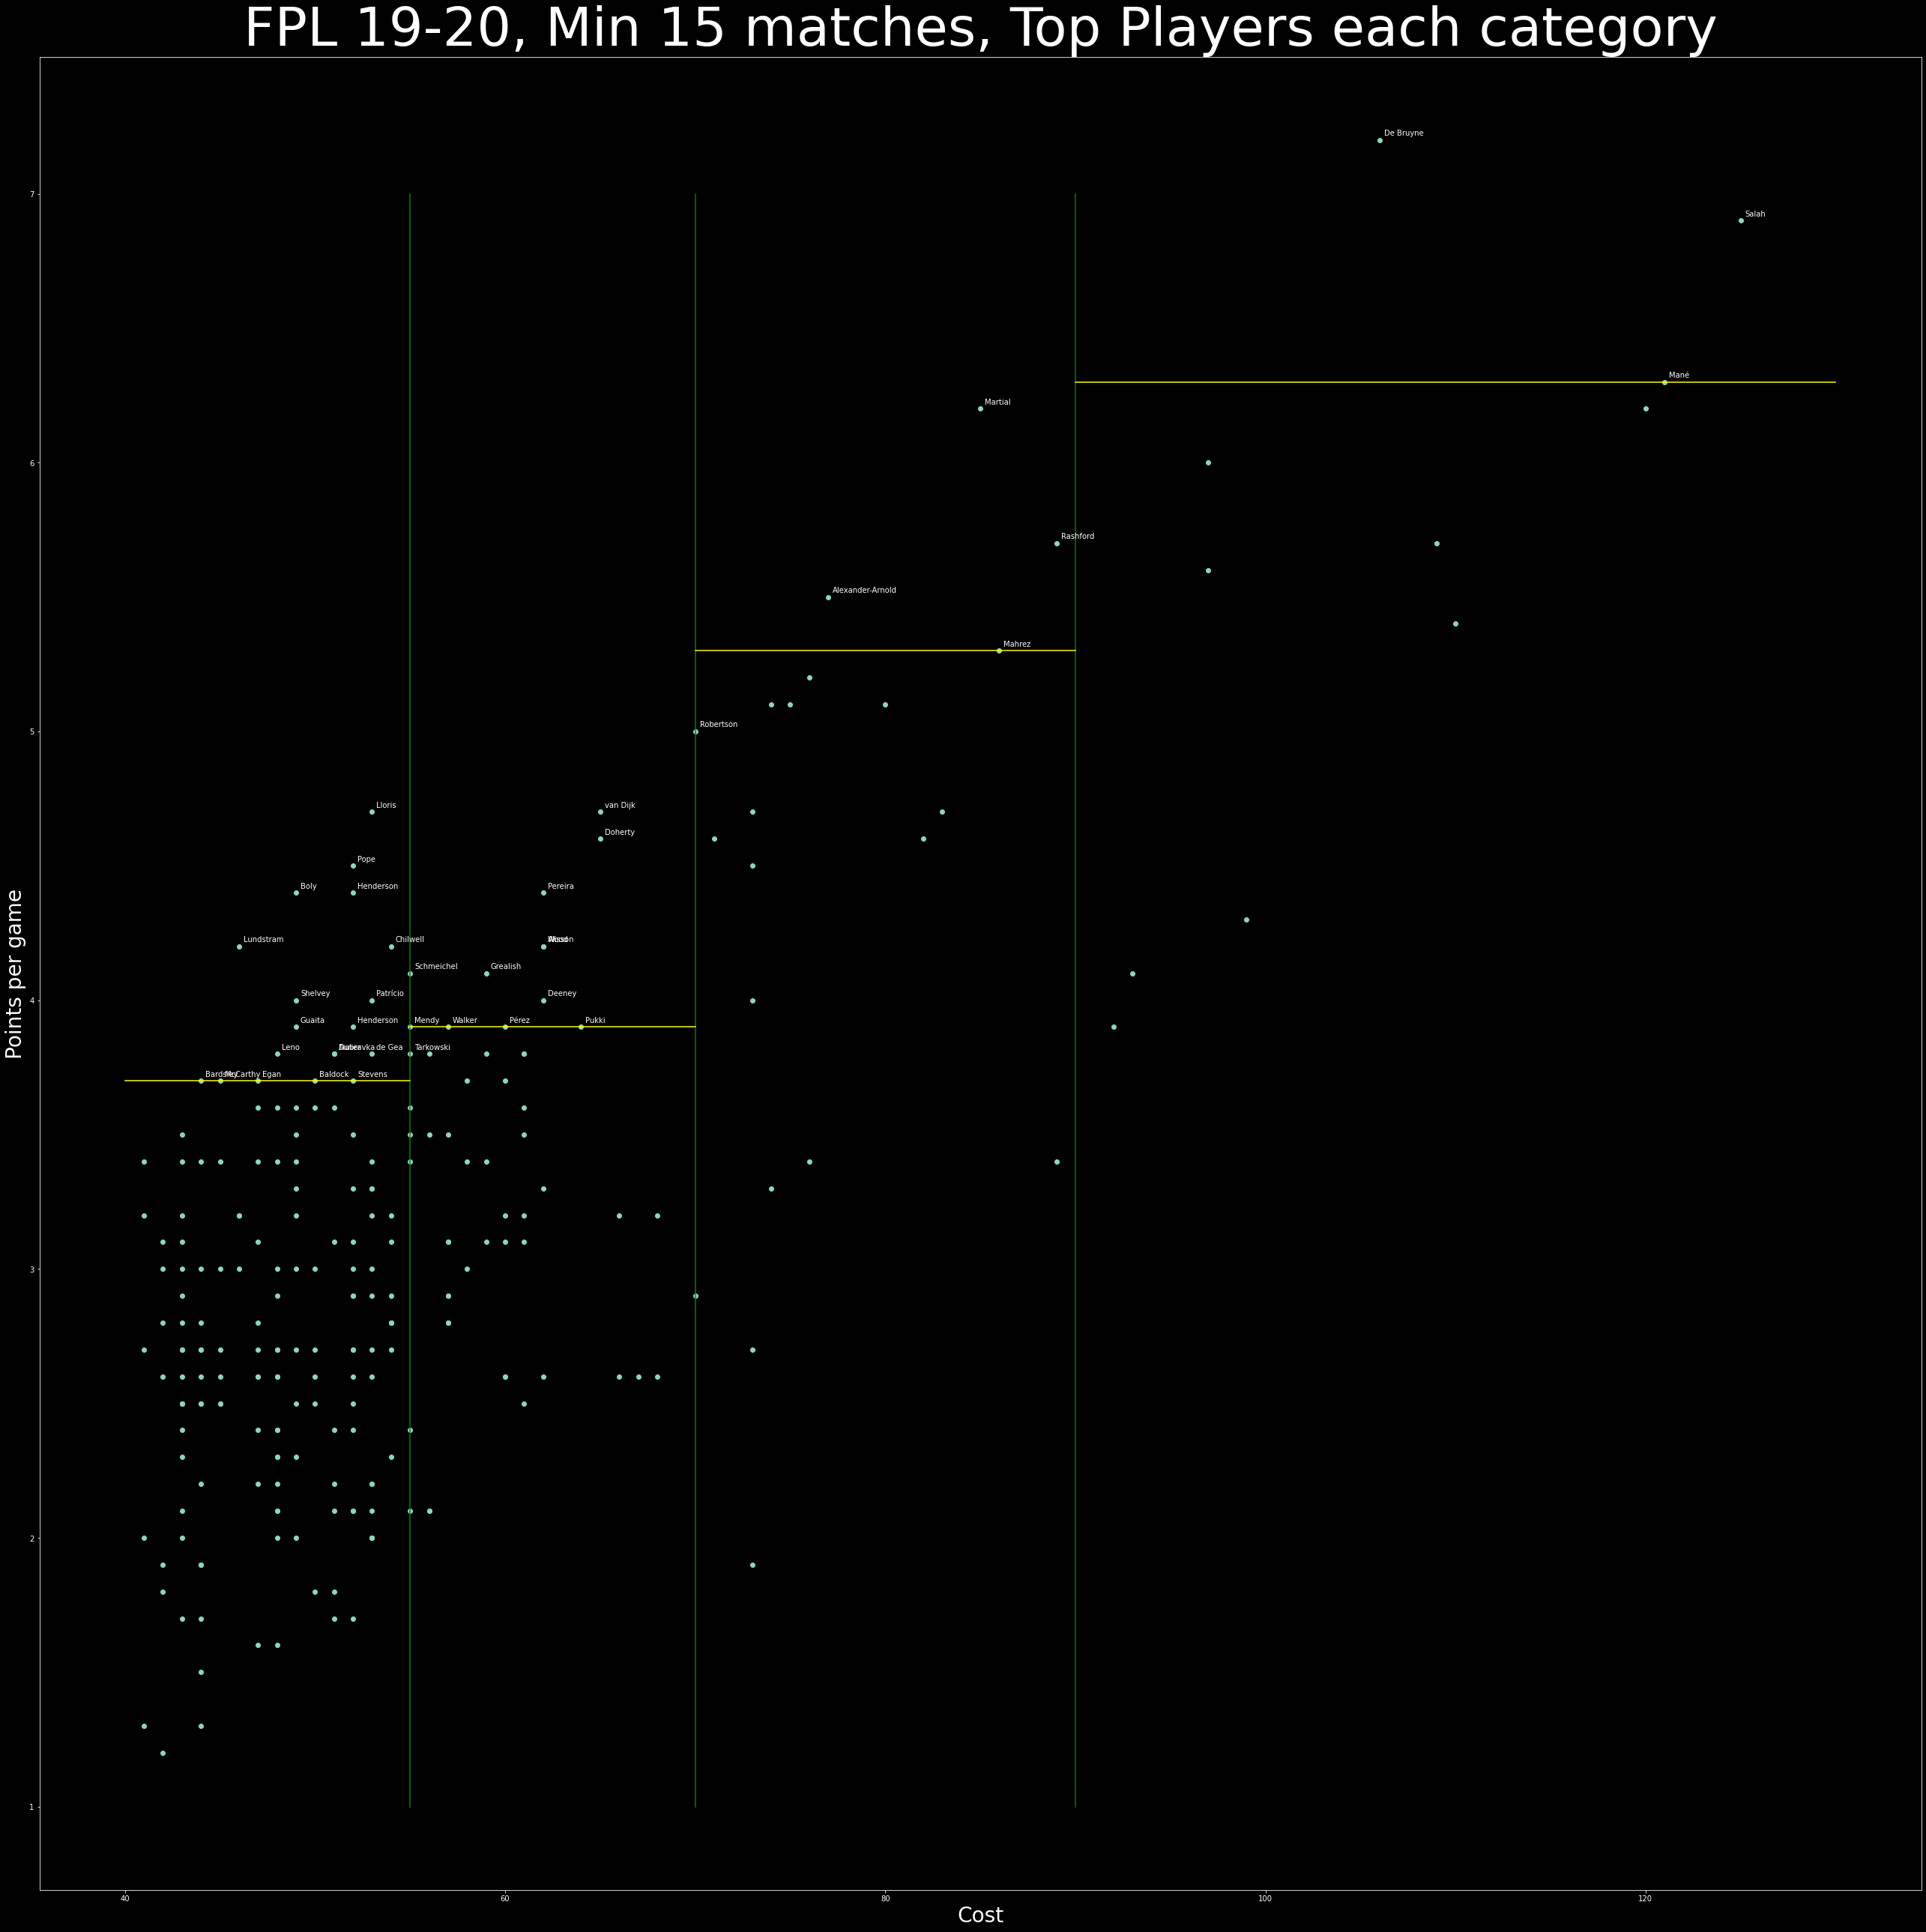

In [75]:
fg_color = 'white'
plt.figure(figsize=(45,45))
plt.style.use("dark_background")
plt.title('FPL 19-20, Min 15 matches, Top Players each category', color=fg_color, size = 72)
plt.xlabel('Cost', color=fg_color, size = 28)
plt.ylabel('Points per game', color=fg_color, size = 28)
plt.scatter(ppg_df['now_cost'] , ppg_df['points_per_game'],  marker='o')
for x,y,lbl in zip(ppg_df['now_cost'] , ppg_df['points_per_game'], ppg_df['web_name']):
    label = lbl

    # this method is called for each point
    if perc(x, y):
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center
    
data=[(55, 55), (1, 7), 'g', (70, 70), (1, 7), 'g', (90, 90), (1, 7), 'g', (90, 130), (6.3, 6.3), 'yellow', (70, 90), (5.3, 5.3), 'yellow'
     , (55, 70), (3.9, 3.9), 'yellow', (40, 55), (3.7, 3.7), 'yellow']
plt.plot(*data)
    
plt.savefig('./figs/FPL_full_plot_top.png')
plt.show()

In [72]:
def perc(x, y):
    if x > 90:
        if y >= 6.3:
            return True
    elif x > 70:
        if y >= 5.3:
            return True
    elif x > 55:
        if y >= 3.9:
            return True
    else:
        if y >= 3.7:
            return True
    return False